## Mood classfication using CNN (HAPPY / SAD)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [29]:
img = image.load_img(r"D:\DeepLearning\training\happy\c.jpg")

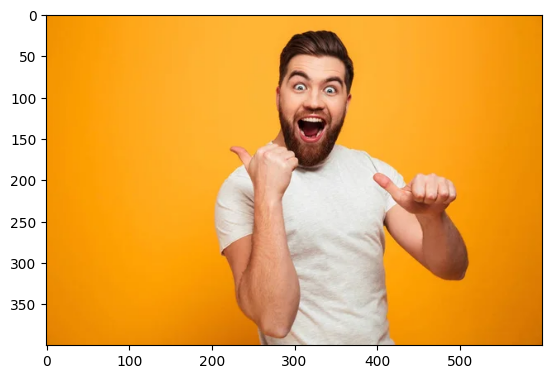

In [30]:
plt.imshow(img)

In [31]:
i1 = cv2.imread(r"D:\DeepLearning\training\happy\c.jpg")
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[  7, 138, 236],
        [  7, 138, 236],
        [  5, 139, 236],
        ...,
        [  1, 138, 232],
        [  0, 135, 229],
        [  0, 134, 228]],

       [[  7, 138, 236],
        [  7, 138, 236],
        [  5, 139, 236],
        ...,
        [  1, 138, 232],
        [  0, 135, 229],
        [  0, 134, 228]],

       [[  7, 138, 236],
        [  7, 138, 236],
        [  5, 139, 236],
        ...,
        [  1, 138, 232],
        [  0, 135, 229],
        [  0, 134, 228]],

       ...,

       [[  4, 123, 217],
        [  4, 123, 217],
        [  2, 123, 217],
        ...,
        [  0, 106, 200],
        [  0, 104, 198],
        [  0, 103, 197]],

       [[  4, 123, 217],
        [  4, 123, 217],
        [  2, 123, 217],
        ...,
        [  0, 107, 200],
        [  0, 104, 198],
        [  0, 103, 197]],

       [[  4, 123, 217],
        [  4, 123, 217],
        [  2, 123, 217],
        ...,
        [  0, 107, 200],
        [  0, 104, 198],
        [  0, 103, 197]]

In [32]:
i1.shape
# shape of your image height, weight, rgb

(400, 600, 3)

In [33]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [34]:
train_dataset = train.flow_from_directory(r"D:\DeepLearning\training",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r"D:\DeepLearning\validatation",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 9 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [35]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [36]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

In [37]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [39]:
model_fit = model.fit(train_dataset, epochs=15)

Epoch 1/15


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.5694 - loss: 5.3455
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4861 - loss: 1.4388
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7500 - loss: 1.3225
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 1.0000 - loss: 0.3871
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.7639 - loss: 0.5614
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 1.0000 - loss: 0.2395
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.2216
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.0382
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.0147
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 1.0000 - loss: 0.0103
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.0019


In [40]:
dir_path = r"D:\DeepLearning\testing"
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

A.jpg
B.jpg
c.jpg
happy_child_202512.jpg
istockphoto-1224823990-612x612.jpg
istockphoto-459385149-612x612.jpg
people-2574170_1280.jpg
sadgirl.jpg
tear-7348539_960_720.jpg


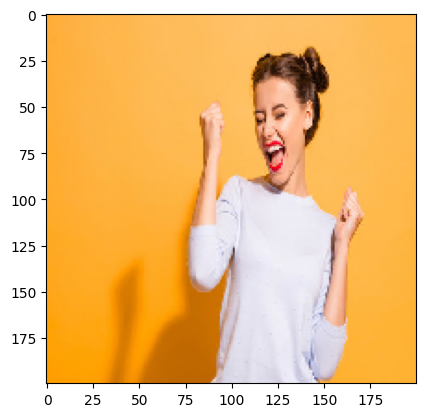

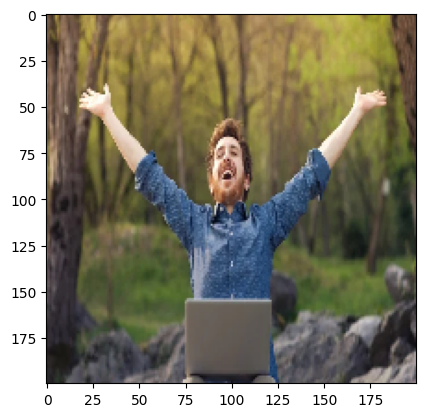

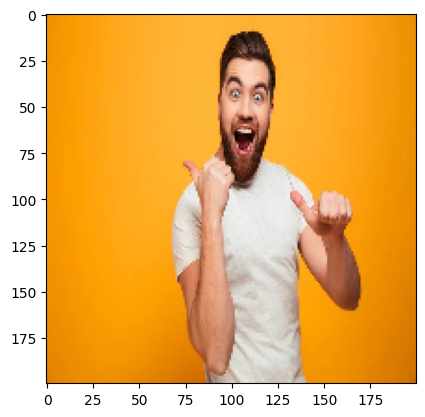

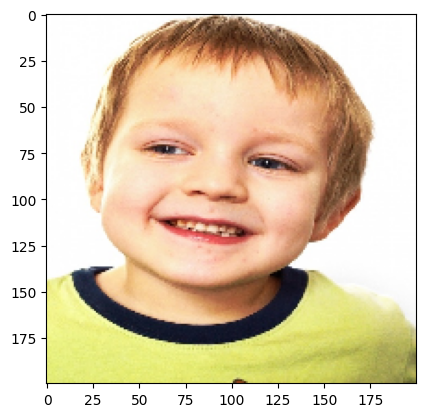

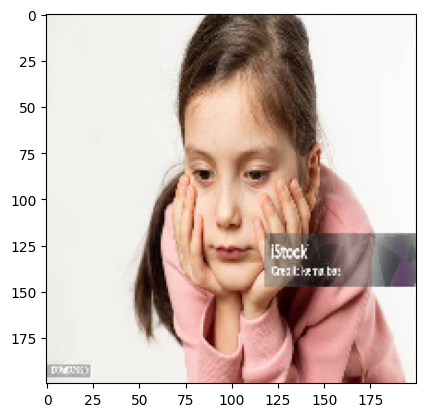

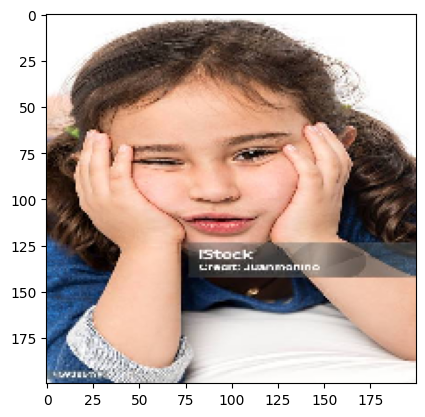

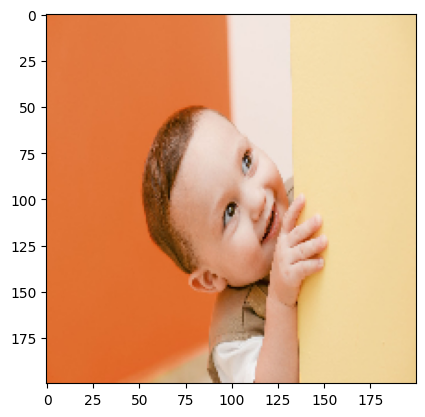

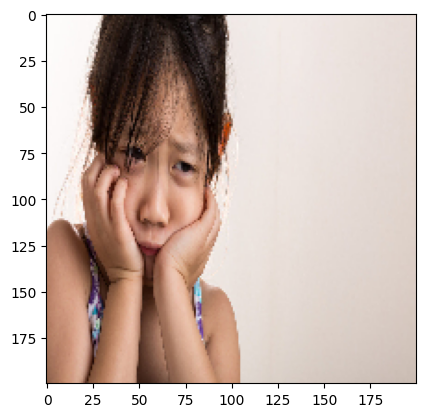

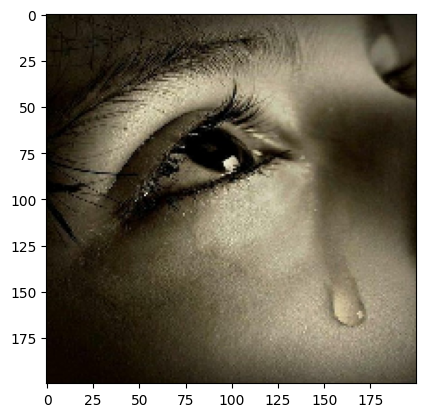

In [41]:
dir_path = r"D:\DeepLearning\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

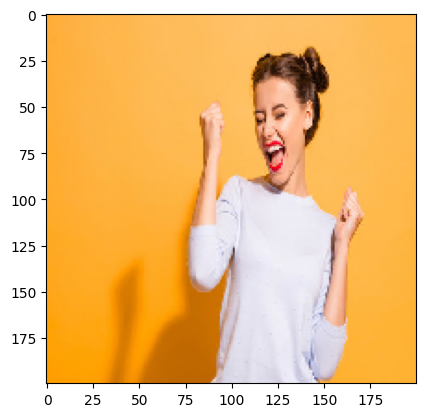

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
 i am happy


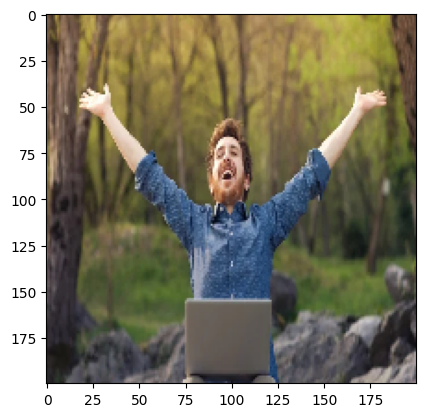

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 i am happy


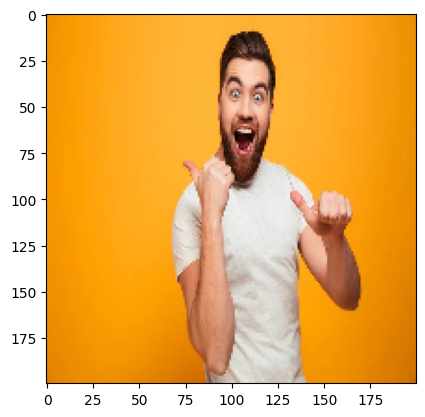

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 i am happy


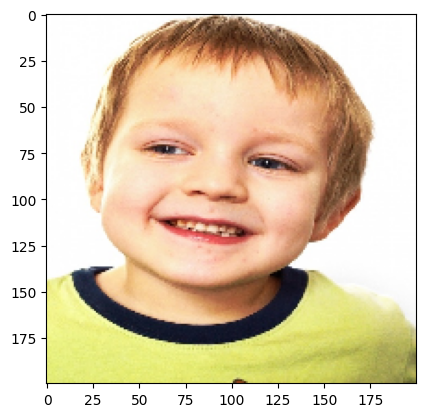

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
 i am happy


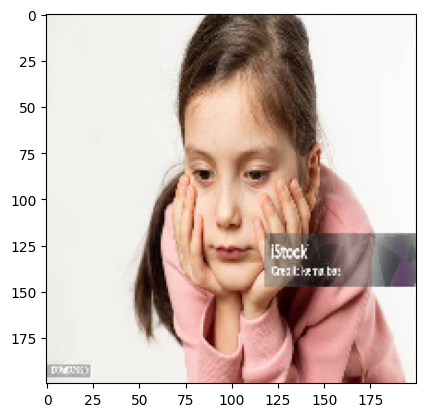

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am not happy


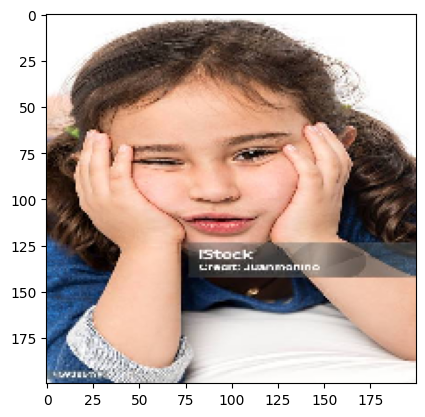

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
i am not happy


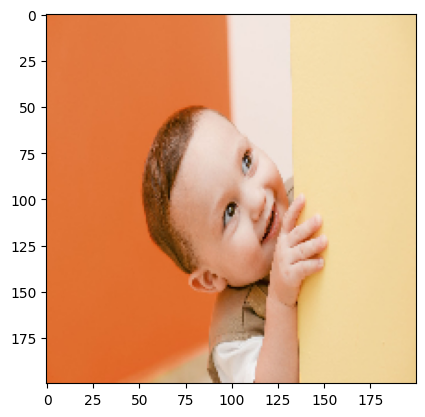

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 i am happy


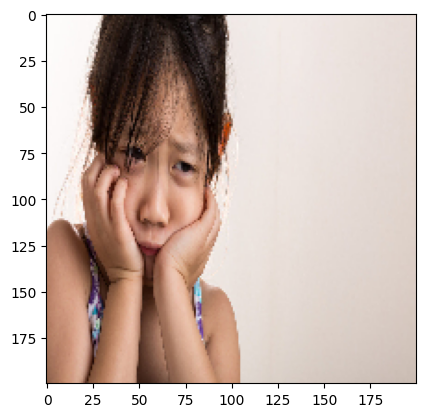

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
i am not happy


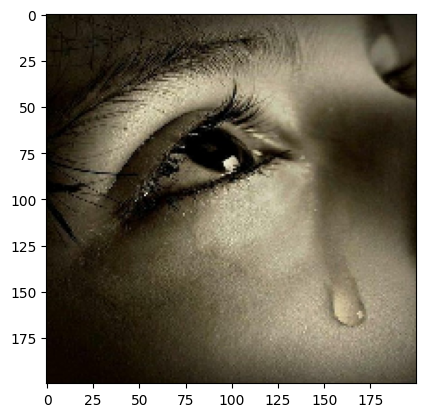

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
i am not happy


In [43]:
dir_path = r"D:\DeepLearning\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')

In [44]:
! nvidia-smi

Fri Jun 13 20:29:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.19                 Driver Version: 561.19         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX450         WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8             N/A / ERR!  |       0MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----